In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [16]:
df.shape

(2149, 35)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [18]:
df = df.dropna()

In [19]:
df = df.drop(["PatientID", "DoctorInCharge"], axis=1)

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [20]:
df.shape

(2149, 33)

In [21]:
#One-Hot Encode Ethnicity because it is not a categorical variable

df = pd.get_dummies(df, columns=["Ethnicity"], dtype=int)

In [22]:
df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,0,1,0,0,1,0,0,0
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,0,0,0,0,1,0,1,0,0,0
2,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,0,1,0,1,0,0,0,0,0,1
3,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,0,0,0,0,1,0,0,0
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,0,1,1,0,0,1,0,0,0


In [23]:
#Create new feature for Simple Average, combine PhysicalActivity, DietQuality, and SleepQuality into a new feature to capture the overall health and lifestyle of individuals
df['OverallHealth'] = (df['PhysicalActivity'] + df['DietQuality'] + df['SleepQuality']) / 3

In [24]:
df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth
0,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,1,0,0,1,0,0,0,5.566668
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,0,0,0,1,0,1,0,0,0,5.096648
2,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,1,0,1,0,0,0,0,0,1,6.448299
3,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,0,0,0,1,0,0,0,8.085386
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,1,1,0,0,1,0,0,0,4.234399


In [25]:
df = df.drop(["PhysicalActivity", "DietQuality", "SleepQuality"], axis=1)

df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth
0,73,0,2,22.927749,0,13.297218,0,0,1,1,...,0,0,1,0,0,1,0,0,0,5.566668
1,89,0,0,26.827681,0,4.542524,0,0,0,0,...,0,0,0,1,0,1,0,0,0,5.096648
2,73,0,1,17.795882,0,19.555085,1,0,0,0,...,1,0,1,0,0,0,0,0,1,6.448299
3,74,1,1,33.800817,1,12.209266,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8.085386
4,89,0,0,20.716974,0,18.454356,0,0,0,0,...,0,1,1,0,0,1,0,0,0,4.234399


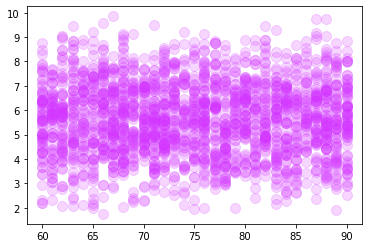

In [33]:
fig, ax = plt.subplots()

ax.scatter(df['Age'], df['OverallHealth'], alpha=.2, s = 100, c = "#d433ff");

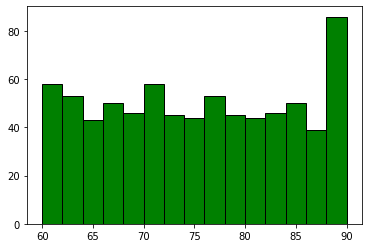

In [35]:
fig, ax = plt.subplots()

ax.hist(df.loc[df['Diagnosis'] == 1, "Age"], color='green', edgecolor='black',  bins=15);

In [36]:
# move the target variable Diagnosis to the end
feature_order = [feature for feature in list(df.columns) if feature not in ["Diagnosis"]] + ["Diagnosis"]

df = df[feature_order]

df.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,OverallHealth,Diagnosis
0,73,0,2,22.927749,0,13.297218,0,0,1,1,...,0,0,1,0,1,0,0,0,5.566668,0
1,89,0,0,26.827681,0,4.542524,0,0,0,0,...,0,0,0,1,1,0,0,0,5.096648,0
2,73,0,1,17.795882,0,19.555085,1,0,0,0,...,1,0,1,0,0,0,0,1,6.448299,0
3,74,1,1,33.800817,1,12.209266,0,0,0,0,...,0,0,0,0,1,0,0,0,8.085386,0
4,89,0,0,20.716974,0,18.454356,0,0,0,0,...,0,1,1,0,1,0,0,0,4.234399,0


In [37]:
# Capital X indicates all of the features that the algorithm will be given to learn from.
# This code X = df.iloc[:, :-1].values takes all the features except the last one from the DataFrame df
X = df.iloc[:, :-1].values

# Lowercase y indicates the target variable, the classifications that you would like to predict.  
y = df.iloc[:, -1].values

In [38]:
# Preview the first 10 rows

X[:10]

array([[7.30000000e+01, 0.00000000e+00, 2.00000000e+00, 2.29277492e+01,
        0.00000000e+00, 1.32972177e+01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.42000000e+02, 7.20000000e+01, 2.42366840e+02, 5.61508970e+01,
        3.36825635e+01, 1.62189143e+02, 2.14635324e+01, 6.51887697e+00,
        0.00000000e+00, 0.00000000e+00, 1.72588346e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.56666848e+00],
       [8.90000000e+01, 0.00000000e+00, 0.00000000e+00, 2.68276812e+01,
        0.00000000e+00, 4.54252382e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.15000000e+02, 6.40000000e+01, 2.31162595e+02, 1.93407996e+02,
        7.90284773e+01, 2.94630909e+02, 2.06132673e+01, 7.11869550e+00,
        0.00000000e+00, 0.00000000e+00,

In [51]:
from sklearn.model_selection import train_test_split

#Specifies that 25% of the data should be used for testing, while the remaining 75% is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [52]:
# Standardize the features so that they are all on the same scale (between -3 and 3)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train);

In [54]:
log_reg.score(X_train_std, y_train)

0.8547486033519553

In [55]:
log_reg.score(X_test_std, y_test)

0.8271375464684015